In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
from datetime import datetime

In [4]:
data['Month'] = pd.to_datetime(data['Month'])
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
data.set_index('Month' , inplace = True)

In [6]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


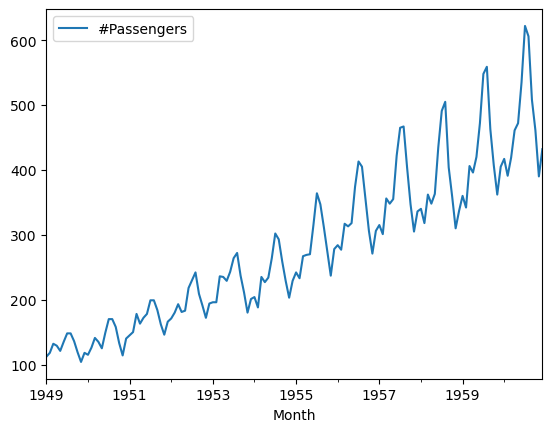

In [7]:
data.plot()
plt.show()

In [8]:
# Decomposition to check dataset component
from statsmodels.tsa.seasonal import seasonal_decompose


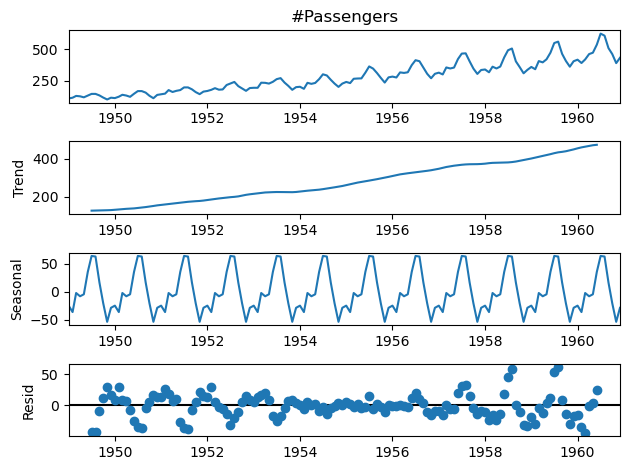

In [9]:
decomposition = seasonal_decompose(data['#Passengers'] , period = 12)
decomposition.plot()
plt.show()

### if trend is there then we need to calculate p,d,q and if seasonality is there then we need to find P,D,Q

In [10]:
# to check data is stationary or not('AUGMENTED DICKEY FULLER TEST')
from statsmodels.tsa.stattools import adfuller


In [11]:
adfuller(data['#Passengers'])

(0.8153688792060502,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [12]:
def adf_check(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey Fuller Test - Data is stationary or not")
    labels = ['ADF Test Statistics' , 'p-value' , '#lags' , 'No. of Observation']
    
    for a, b in zip(result , labels):
        print(b + " : " + str(a))
        
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis and my timeseries is Stationary")
    else:
        print('Weak evidence against null hypothesis and my timeseries is Non - Stationary')

In [13]:
adf_check(data)

Augmented Dickey Fuller Test - Data is stationary or not
ADF Test Statistics : 0.8153688792060502
p-value : 0.991880243437641
#lags : 13
No. of Observation : 130
Weak evidence against null hypothesis and my timeseries is Non - Stationary


### * if data is non stationary then first we need to make our data stationary and this we can do by the help of lag function

In [14]:
data['1st diff'] = data['#Passengers'] - data['#Passengers'].shift(1)
data.head()

,#Passengers,1st diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [15]:
adf_check(data['1st diff'].dropna())

Augmented Dickey Fuller Test - Data is stationary or not
ADF Test Statistics : -2.829266824170006
p-value : 0.05421329028382468
#lags : 12
No. of Observation : 130
Weak evidence against null hypothesis and my timeseries is Non - Stationary


In [16]:
data['2nd diff'] = data['1st diff'] - data['1st diff'].shift(1)
data.head()

,#Passengers,1st diff,2nd diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0


In [17]:
adf_check(data['2nd diff'].dropna())

Augmented Dickey Fuller Test - Data is stationary or not
ADF Test Statistics : -16.384231542468527
p-value : 2.732891850014085e-29
#lags : 11
No. of Observation : 130
Strong evidence against null hypothesis and my timeseries is Stationary


### Now time series data is stationary

In [18]:
# d = 2 (no. of difference)

In [19]:
# create a seasonality
data['Seasonality'] = data['#Passengers'] - data['#Passengers'].shift(12)
data.head(15)

,#Passengers,1st diff,2nd diff,Seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
1949-06-01,135,14.0,22.0,NaN
1949-07-01,148,13.0,-1.0,NaN
1949-08-01,148,0.0,-13.0,NaN
1949-09-01,136,-12.0,-12.0,NaN


In [20]:
adf_check(data['Seasonality'].dropna())

Augmented Dickey Fuller Test - Data is stationary or not
ADF Test Statistics : -3.3830207264924805
p-value : 0.011551493085514982
#lags : 1
No. of Observation : 130
Strong evidence against null hypothesis and my timeseries is Stationary


# **Trend 

In [21]:
# To find P , Q, p, q value
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

### Correlation 
### 1) -0.2 to 0.2 - no correlation 
### 2) -0.6 to -0.2  and 0.2 to 0.6 - weak correlation
### 3) -1 to -0.6 and 0.6 to 1 - strong correlation
### the time we get no correlation we will stop checking then

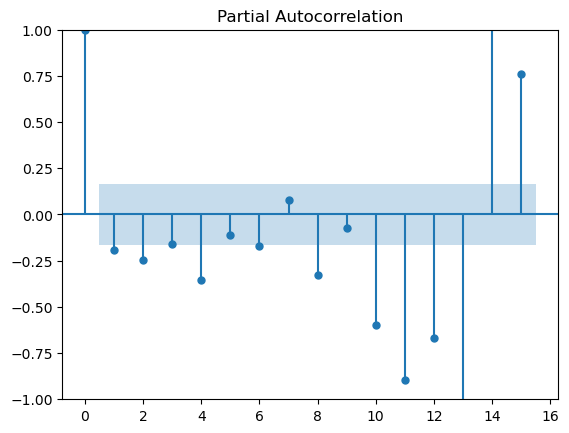

In [22]:
# to find p

plot_pacf(data['2nd diff'].dropna() , lags = 15)
plt.show()
# Trend (p= 2, d= 2, q= )

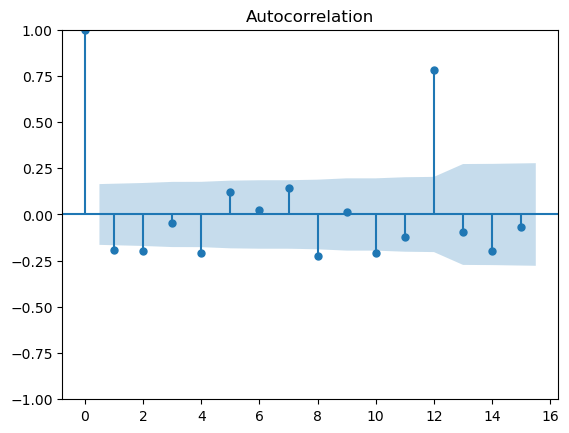

In [23]:
# to find q
plot_acf(data['2nd diff'].dropna() , lags = 15)
plt.show()
# Trend (p= 2, d= 2, q=2 )

# ** Seasonality

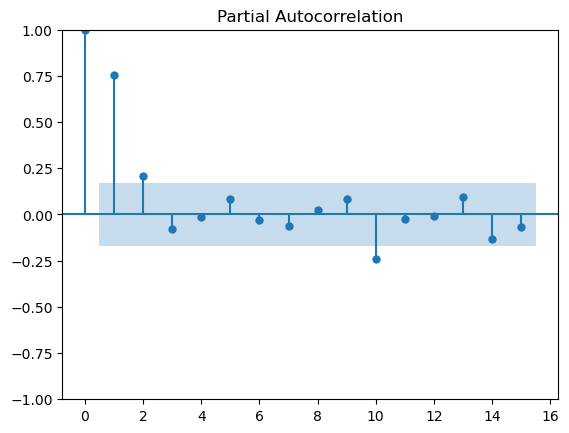

In [24]:
# to find P
plot_pacf(data['Seasonality'].dropna() , lags = 15)
plt.show()
# Seasonality(P = 2, D = 1, Q= )

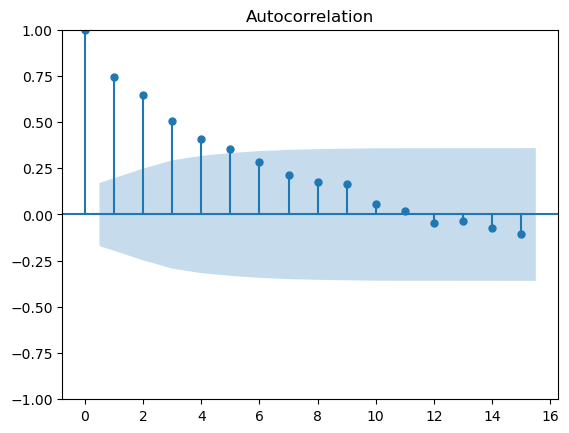

In [25]:
# to find q
plot_acf(data['Seasonality'].dropna() , lags = 15)
plt.show()
# Seasonality(P = 2, D = 1, Q= 5 )

### Trend (p= 2, d= 2, q=2 )
### Seasonality(P = 2, D = 1, Q= 5 )

In [26]:
# Building Time series forecasting
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [36]:
model1 = sm.tsa.statespace.SARIMAX(data['#Passengers'] , order = (2,2,2) , seasonal_order = (2,1,5,12) ,
                                   enforce_stationarity=False , enforce_invertibility = False)
result1 = model1.fit()
print(result1.summary())

C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                            SARIMAX Results                                             
Dep. Variable:                                      #Passengers   No. Observations:                  144
Model:             SARIMAX(2, 2, 2)x(2, 1, [1, 2, 3, 4, 5], 12)   Log Likelihood                -264.697
Date:                                          Tue, 07 Feb 2023   AIC                            553.394
Time:                                                  21:10:25   BIC                            579.850
Sample:                                              01-01-1949   HQIC                           563.863
                                                   - 12-01-1960                                         
Covariance Type:                                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar

In [37]:
model2 = sm.tsa.statespace.SARIMAX(data['#Passengers'] , order = (2,2,2) , seasonal_order = (2,1,4,12) ,
                                   enforce_stationarity=False , enforce_invertibility = False)
result2 = model2.fit()
print(result2.summary())

C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                           SARIMAX Results                                           
Dep. Variable:                                   #Passengers   No. Observations:                  144
Model:             SARIMAX(2, 2, 2)x(2, 1, [1, 2, 3, 4], 12)   Log Likelihood                -308.419
Date:                                       Tue, 07 Feb 2023   AIC                            638.837
Time:                                               21:10:55   BIC                            664.901
Sample:                                           01-01-1949   HQIC                           649.279
                                                - 12-01-1960                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0747     

In [38]:
model3 = sm.tsa.statespace.SARIMAX(data['#Passengers'] , order = (2,2,2) , seasonal_order = (2,1,3,12) ,
                                   enforce_stationarity=False ,enforce_invertibility = False)
result3 = model3.fit()
print(result3.summary())

C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                #Passengers   No. Observations:                  144
Model:             SARIMAX(2, 2, 2)x(2, 1, [1, 2, 3], 12)   Log Likelihood               -1223.421
Date:                                    Tue, 07 Feb 2023   AIC                           2466.842
Time:                                            21:11:07   BIC                           2491.951
Sample:                                        01-01-1949   HQIC                          2476.972
                                             - 12-01-1960                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5169   7.78e-27  -6.64e+25      0

In [39]:
model4 = sm.tsa.statespace.SARIMAX(data['#Passengers'] , order = (2,2,2) , seasonal_order = (2,1,2,12) ,
                                   enforce_stationarity=False , enforce_invertibility = False)
result4 = model4.fit()
print(result4.summary())

C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(2, 2, 2)x(2, 1, 2, 12)   Log Likelihood                -404.921
Date:                            Tue, 07 Feb 2023   AIC                            827.842
Time:                                    21:11:13   BIC                            851.555
Sample:                                01-01-1949   HQIC                           837.447
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3028      0.144     -9.035      0.000      -1.585      -1.020
ar.L2         -0.4015      0.110   

In [40]:
model5 = sm.tsa.statespace.SARIMAX(data['#Passengers'] , order = (2,2,2) , seasonal_order = (2,1,1,12) ,
                                   enforce_stationarity=False , enforce_invertibility = False)
result5 = model5.fit()
print(result5.summary())

C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                          #Passengers   No. Observations:                  144
Model:             SARIMAX(2, 2, 2)x(2, 1, [1], 12)   Log Likelihood                -408.247
Date:                              Tue, 07 Feb 2023   AIC                            832.495
Time:                                      21:11:37   BIC                            853.650
Sample:                                  01-01-1949   HQIC                           841.065
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2748      0.129     -9.895      0.000      -1.527      -1.022
ar.L2         -0.37

C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
# lesser the AIC better the model
# AIC : 553.394 , seasonal_order : (2,1,5,12)(this is better)
# AIC : 638.837 , seasonal_order : (2,1,4,12)
# AIC : 2466.842 , seasonal_order : (2,1,3,12)
# AIC : 827.842 , seasonal_order : (2,1,2,12)
# AIC : 832.495 , seasonal_order : (2,1,1,12) 

In [27]:
# Auto ARIMA approach

import itertools

p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_PDQ = [(x[0], x[1], x[2], 12) for x in pdq]

print("Few Parameter combinations are : ")
print('{} X {}'.format(pdq[1], seasonal_PDQ[1]))
print('{} X {}'.format(pdq[2], seasonal_PDQ[2]))

Few Parameter combinations are : 
(0, 0, 1) X (0, 0, 1, 12)
(0, 1, 0) X (0, 1, 0, 12)


In [35]:
for param in pdq:
    for param_seasonal in seasonal_PDQ:
        try:
            model = sm.tsa.statespace.SARIMAX(data['#Passengers'] ,
                                               order = param ,
                                               seasonal_order = param_seasonal ,
                                               enforce_stationarity= False,
                                               enforce_invertibility = False)
            results = model.fit()
            print('ARIMA {} x {} - AIC : {}'.format(param, param_seasonal, results.aic))
        
        except:
            continue

            

C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 0) x (0, 0, 0, 12) - AIC : 2044.4329486427587


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was pr

ARIMA (0, 0, 0) x (0, 0, 1, 12) - AIC : 1886.6012941219583
ARIMA (0, 0, 0) x (0, 1, 0, 12) - AIC : 1315.9211929474204
ARIMA (0, 0, 0) x (0, 1, 1, 12) - AIC : 1156.2914901508518
ARIMA (0, 0, 0) x (1, 0, 0, 12) - AIC : 1118.6259190717344


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 0) x (1, 0, 1, 12) - AIC : 1107.2562043237326
ARIMA (0, 0, 0) x (1, 1, 0, 12) - AIC : 1109.2437994445113


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 0) x (1, 1, 1, 12) - AIC : 1033.617216673021
ARIMA (0, 0, 1) x (0, 0, 0, 12) - AIC : 1846.0789377571568


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1) x (0, 0, 1, 12) - AIC : 1567.9916312320534
ARIMA (0, 0, 1) x (0, 1, 0, 12) - AIC : 1196.9983614399844


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1) x (0, 1, 1, 12) - AIC : 1072.138298404436


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1) x (1, 0, 0, 12) - AIC : 1071.0026810183701


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1) x (1, 0, 1, 12) - AIC : 1049.5801418348813


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1) x (1, 1, 0, 12) - AIC : 1059.51122232904


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1) x (1, 1, 1, 12) - AIC : 985.334647803353
ARIMA (0, 1, 0) x (0, 0, 0, 12) - AIC : 1405.0006612949667


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 0) x (0, 0, 1, 12) - AIC : 1194.7130010979704
ARIMA (0, 1, 0) x (0, 1, 0, 12) - AIC : 1024.4816429833936


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 0) x (0, 1, 1, 12) - AIC : 937.7995265380556
ARIMA (0, 1, 0) x (1, 0, 0, 12) - AIC : 1031.4838983661916


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 0) x (1, 0, 1, 12) - AIC : 1015.0000347579969
ARIMA (0, 1, 0) x (1, 1, 0, 12) - AIC : 944.4876301158425


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 0) x (1, 1, 1, 12) - AIC : 939.7984372654357
ARIMA (0, 1, 1) x (0, 0, 0, 12) - AIC : 1379.4417180072924


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 1) x (0, 0, 1, 12) - AIC : 1181.630945875926
ARIMA (0, 1, 1) x (0, 1, 0, 12) - AIC : 1006.7919047398655


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 1) x (0, 1, 1, 12) - AIC : 920.6308317604695
ARIMA (0, 1, 1) x (1, 0, 0, 12) - AIC : 1014.2239031825341


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 1) x (1, 0, 1, 12) - AIC : 985.1362335306424
ARIMA (0, 1, 1) x (1, 1, 0, 12) - AIC : 934.7975425749124


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 1) x (1, 1, 1, 12) - AIC : 920.3192974988949
ARIMA (1, 0, 0) x (0, 0, 0, 12) - AIC : 1415.9068815931885


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 0) x (0, 0, 1, 12) - AIC : 1205.3907786172574
ARIMA (1, 0, 0) x (0, 1, 0, 12) - AIC : 1029.9773091701022


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 0) x (0, 1, 1, 12) - AIC : 944.3854921533178


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 0) x (1, 0, 0, 12) - AIC : 1017.315549351643


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 0) x (1, 0, 1, 12) - AIC : 1007.0272556234545
ARIMA (1, 0, 0) x (1, 1, 0, 12) - AIC : 944.0441660825556


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 0) x (1, 1, 1, 12) - AIC : 945.4400866866581
ARIMA (1, 0, 1) x (0, 0, 0, 12) - AIC : 1390.4515018414943


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (0, 0, 1, 12) - AIC : 1192.29496316195
ARIMA (1, 0, 1) x (0, 1, 0, 12) - AIC : 1014.254782462504


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (0, 1, 1, 12) - AIC : 929.4329707892181


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (1, 0, 0, 12) - AIC : 1009.5891017292518


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (1, 0, 1, 12) - AIC : 989.1764736699959


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (1, 1, 0, 12) - AIC : 935.8163348218318


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (1, 1, 1, 12) - AIC : 935.9152860560146
ARIMA (1, 1, 0) x (0, 0, 0, 12) - AIC : 1392.9437938537153


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 0) x (0, 0, 1, 12) - AIC : 1190.5342929076292
ARIMA (1, 1, 0) x (0, 1, 0, 12) - AIC : 1013.3680449838157


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 0) x (0, 1, 1, 12) - AIC : 928.1312837305513


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 0) x (1, 0, 0, 12) - AIC : 1007.6496486405264


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 0) x (1, 0, 1, 12) - AIC : 995.4636249453752
ARIMA (1, 1, 0) x (1, 1, 0, 12) - AIC : 927.5904374710306


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 0) x (1, 1, 1, 12) - AIC : 928.1418620185419
ARIMA (1, 1, 1) x (0, 0, 0, 12) - AIC : 1377.2926858930796


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1) x (0, 0, 1, 12) - AIC : 1185.3340359693718
ARIMA (1, 1, 1) x (0, 1, 0, 12) - AIC : 1008.552881348966


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1) x (0, 1, 1, 12) - AIC : 922.4148960115987


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1) x (1, 0, 0, 12) - AIC : 1009.1896100682773


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1) x (1, 0, 1, 12) - AIC : 987.1339264671003


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1) x (1, 1, 0, 12) - AIC : 929.5756208330703


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1) x (1, 1, 1, 12) - AIC : 922.2053774352001


# Prediction

<AxesSubplot:xlabel='Month'>

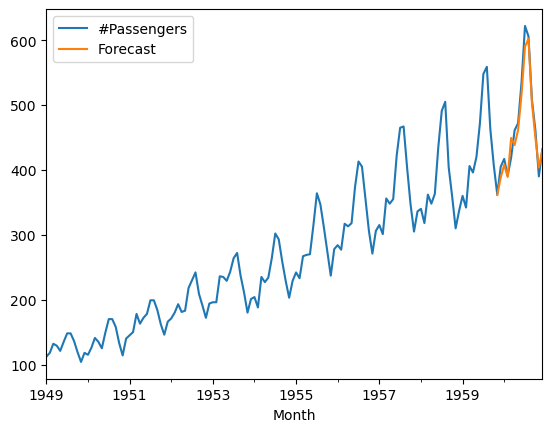

In [42]:
# validate model is correct or not
data['Forecast'] = results.predict(start = 130 , end = 144 , dynamic = True)
data[['#Passengers' , 'Forecast']].plot()

In [43]:
data.tail()

,#Passengers,1st diff,2nd diff,Seasonality,Forecast
Month,,,,,
1960-08-01,606,-16.0,-103.0,47.0,602.189421
1960-09-01,508,-98.0,-82.0,45.0,503.349383
1960-10-01,461,-47.0,51.0,54.0,449.827224
1960-11-01,390,-71.0,-24.0,28.0,403.527894
1960-12-01,432,42.0,113.0,27.0,430.234705


In [44]:
# time series model is absolutely fine we can forecast the no. of passengers
from pandas.tseries.offsets import DateOffset


In [46]:
future_dates = [data.index[-1] + DateOffset(months = x) for x in range(0,61) ]

In [47]:
future_dates

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-

In [49]:
future_date_df = pd.DataFrame(index = future_dates[1:], columns = data.columns)

In [50]:
future_date_df.head()

,#Passengers,1st diff,2nd diff,Seasonality,Forecast
1961-01-01,NaN,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN,NaN


In [51]:
future_df = pd.concat([data , future_date_df])

In [53]:
future_df.tail()

,#Passengers,1st diff,2nd diff,Seasonality,Forecast
1965-08-01,NaN,NaN,NaN,NaN,NaN
1965-09-01,NaN,NaN,NaN,NaN,NaN
1965-10-01,NaN,NaN,NaN,NaN,NaN
1965-11-01,NaN,NaN,NaN,NaN,NaN
1965-12-01,NaN,NaN,NaN,NaN,NaN


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:>

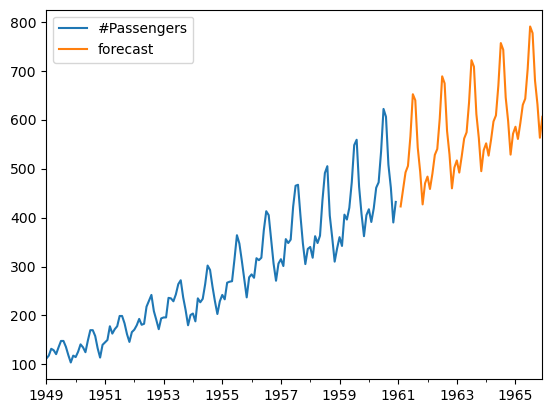

In [57]:
future_df['forecast'] = results.predict(start = 145 , end = 203 , dynamic = True)
future_df[['#Passengers' , 'forecast']].plot()

In [58]:
future_df.tail()

,#Passengers,1st diff,2nd diff,Seasonality,Forecast,forecast
1965-08-01,NaN,NaN,NaN,NaN,NaN,776.859824
1965-09-01,NaN,NaN,NaN,NaN,NaN,679.826014
1965-10-01,NaN,NaN,NaN,NaN,NaN,631.244535
1965-11-01,NaN,NaN,NaN,NaN,NaN,563.100489
1965-12-01,NaN,NaN,NaN,NaN,NaN,605.912726


In [60]:
future_df.to_csv('predictions.csv')